In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Sanciones_database_ocupada_limpio(Sheet1).csv to Sanciones_database_ocupada_limpio(Sheet1) (2).csv


In [ ]:
import pandas as pd

# Carga el archivo (ajusta el nombre si es distinto)
df = pd.read_csv("Sanciones_database_ocupada_limpio(Sheet1).csv", encoding='latin1')

# Mostrar las primeras filas
df.head()


,AÑO SANCIÓN,MES SANCIÓN,Canal / Cable Operador,MES EMISIÓN,AÑO EMISIÓN,Contenidos Denunciados,MULTA,TEMA DENUNICIADO
0,2012,DICIEMBRE,CLARO,AGOSTO,2012, Se afecta a la formación espiritual e intele...,0,Contenido Inapropiado para Menores en Horario ...
1,2012,DICIEMBRE,DIRECTV,SEPTIEMBRE,2012, Se afecta a la formación espiritual e intele...,0,Contenido Inapropiado para Menores en Horario ...
2,2012,DICIEMBRE,INET TV (Castro),MAYO,2012, Incumplimiento de la obligación de informar ...,0,Incumplimiento de Normativa Técnica (Señalizac...
3,2012,DICIEMBRE,RTV (Castro),MAYO,2012, Incumplimiento de la obligación de informar ...,0,Incumplimiento de Normativa Técnica (Señalizac...
4,2012,DICIEMBRE,TV Pucón,AGOSTO,2012, Se afecta a la formación espiritual e intele...,0,Contenido Inapropiado para Menores en Horario ...


In [ ]:
print(df.columns)


Index(['AÑO SANCIÓN', 'MES SANCIÓN', 'Canal / Cable Operador', 'MES EMISIÓN',
       'AÑO EMISIÓN', 'Contenidos Denunciados', 'MULTA', 'TEMA DENUNICIADO'],
      dtype='object')


Saving Sanciones_database_ocupada_limpio(Sheet1).csv to Sanciones_database_ocupada_limpio(Sheet1) (3).csv


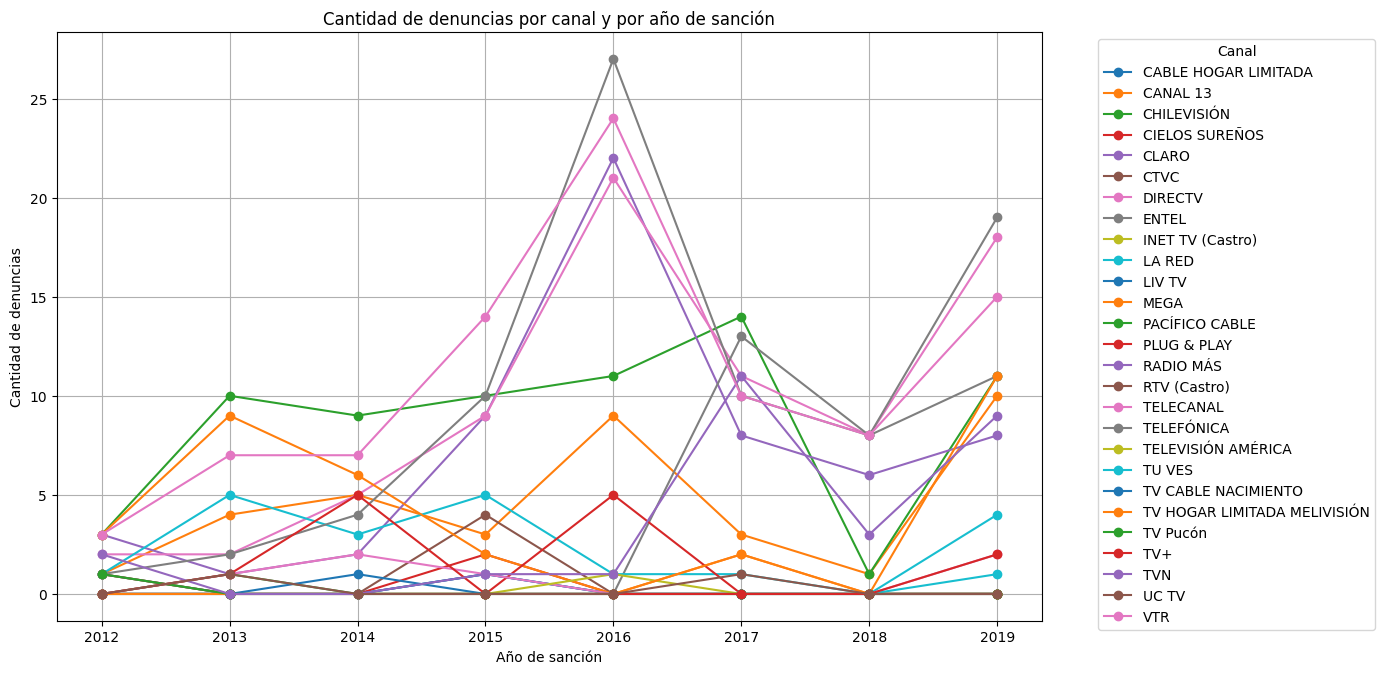

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 1. Subir archivo
uploaded = files.upload()

# 2. Leer archivo (ajustamos la codificación)
df = pd.read_csv("Sanciones_database_ocupada_limpio(Sheet1).csv", encoding='latin1')

# 3. Limpiar nombres de columnas (eliminar espacios extra)
df.columns = df.columns.str.strip()

# 4. Agrupar por año y canal, contando la cantidad de denuncias (una por fila)
denuncias = df.groupby(['AÑO SANCIÓN', 'Canal / Cable Operador']).size().reset_index(name='Cantidad')

# 5. Reorganizar para que cada canal sea una línea
pivot = denuncias.pivot(index='AÑO SANCIÓN', columns='Canal / Cable Operador', values='Cantidad').fillna(0)

# 6. Graficar
plt.figure(figsize=(14, 7))
for canal in pivot.columns:
    plt.plot(pivot.index, pivot[canal], marker='o', label=canal)

plt.title('Cantidad de denuncias por canal y por año de sanción')
plt.xlabel('Año de sanción')
plt.ylabel('Cantidad de denuncias')
plt.legend(title='Canal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


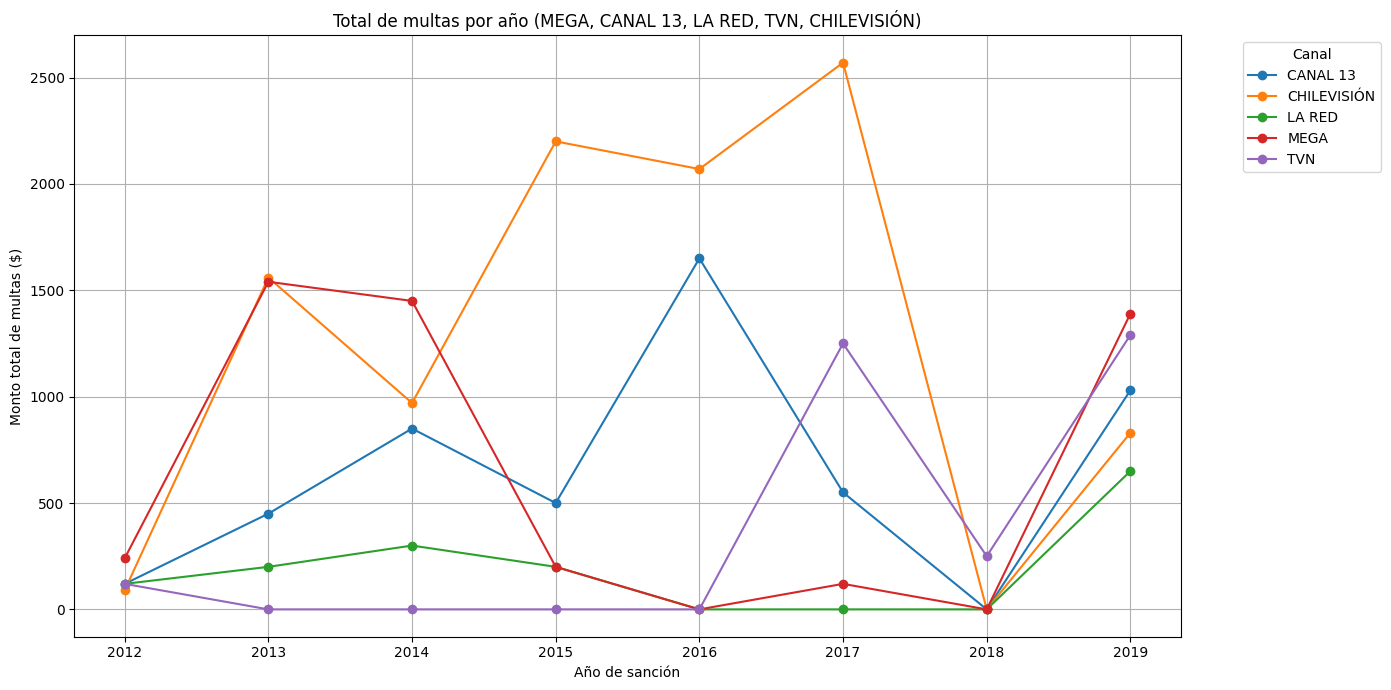

In [ ]:
# 1. Asegurarnos de que la columna MULTA sea numérica
df['MULTA'] = pd.to_numeric(df['MULTA'], errors='coerce')

# 2. Limpiar espacios en los nombres de canal (por si acaso)
df['Canal / Cable Operador'] = df['Canal / Cable Operador'].str.strip().str.upper()

# 3. Filtrar por los canales que nos interesan
canales_interes = ['MEGA', 'CANAL 13', 'LA RED', 'TVN', 'CHILEVISIÓN']
df_filtrado = df[df['Canal / Cable Operador'].isin(canales_interes)]

# 4. Agrupar por año y canal, sumando las multas
multas = df_filtrado.groupby(['AÑO SANCIÓN', 'Canal / Cable Operador'])['MULTA'].sum().reset_index()

# 5. Reorganizar los datos para visualización
pivot_multas = multas.pivot(index='AÑO SANCIÓN', columns='Canal / Cable Operador', values='MULTA').fillna(0)

# 6. Crear gráfico de líneas
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
for canal in pivot_multas.columns:
    plt.plot(pivot_multas.index, pivot_multas[canal], marker='o', label=canal)

plt.title('Total de multas por año (MEGA, CANAL 13, LA RED, TVN, CHILEVISIÓN)')
plt.xlabel('Año de sanción')
plt.ylabel('Monto total de multas ($)')
plt.legend(title='Canal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
